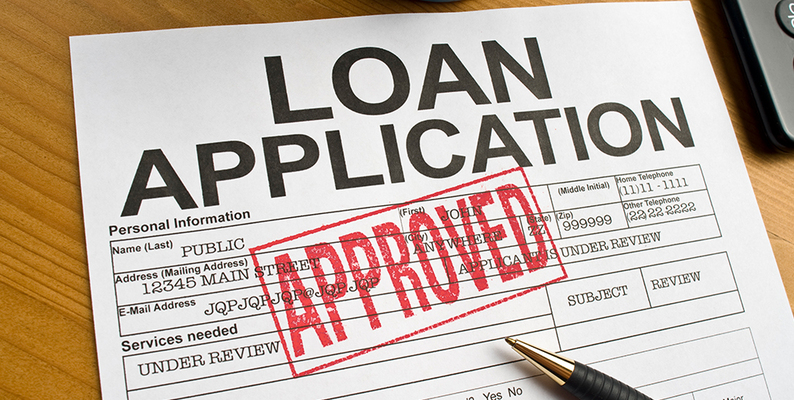

## About Dataset:
- Dependent variable is 'Personal.Loan'. 0 indicates loan not approved and 1 indicates loan approved.

## OBJECTIVE:
- We will do Exploratory Data Analysis and use Decision Tree to predict the Loan Approval

## Step 1: Data Loading and Understanding

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [117]:
bank_loan = pd.read_csv('bankloan.csv')
bank_loan.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [118]:
# Checking the information about the dataset
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [119]:
# Description of the dataset

bank_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [120]:
# Checking for missing informations
bank_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

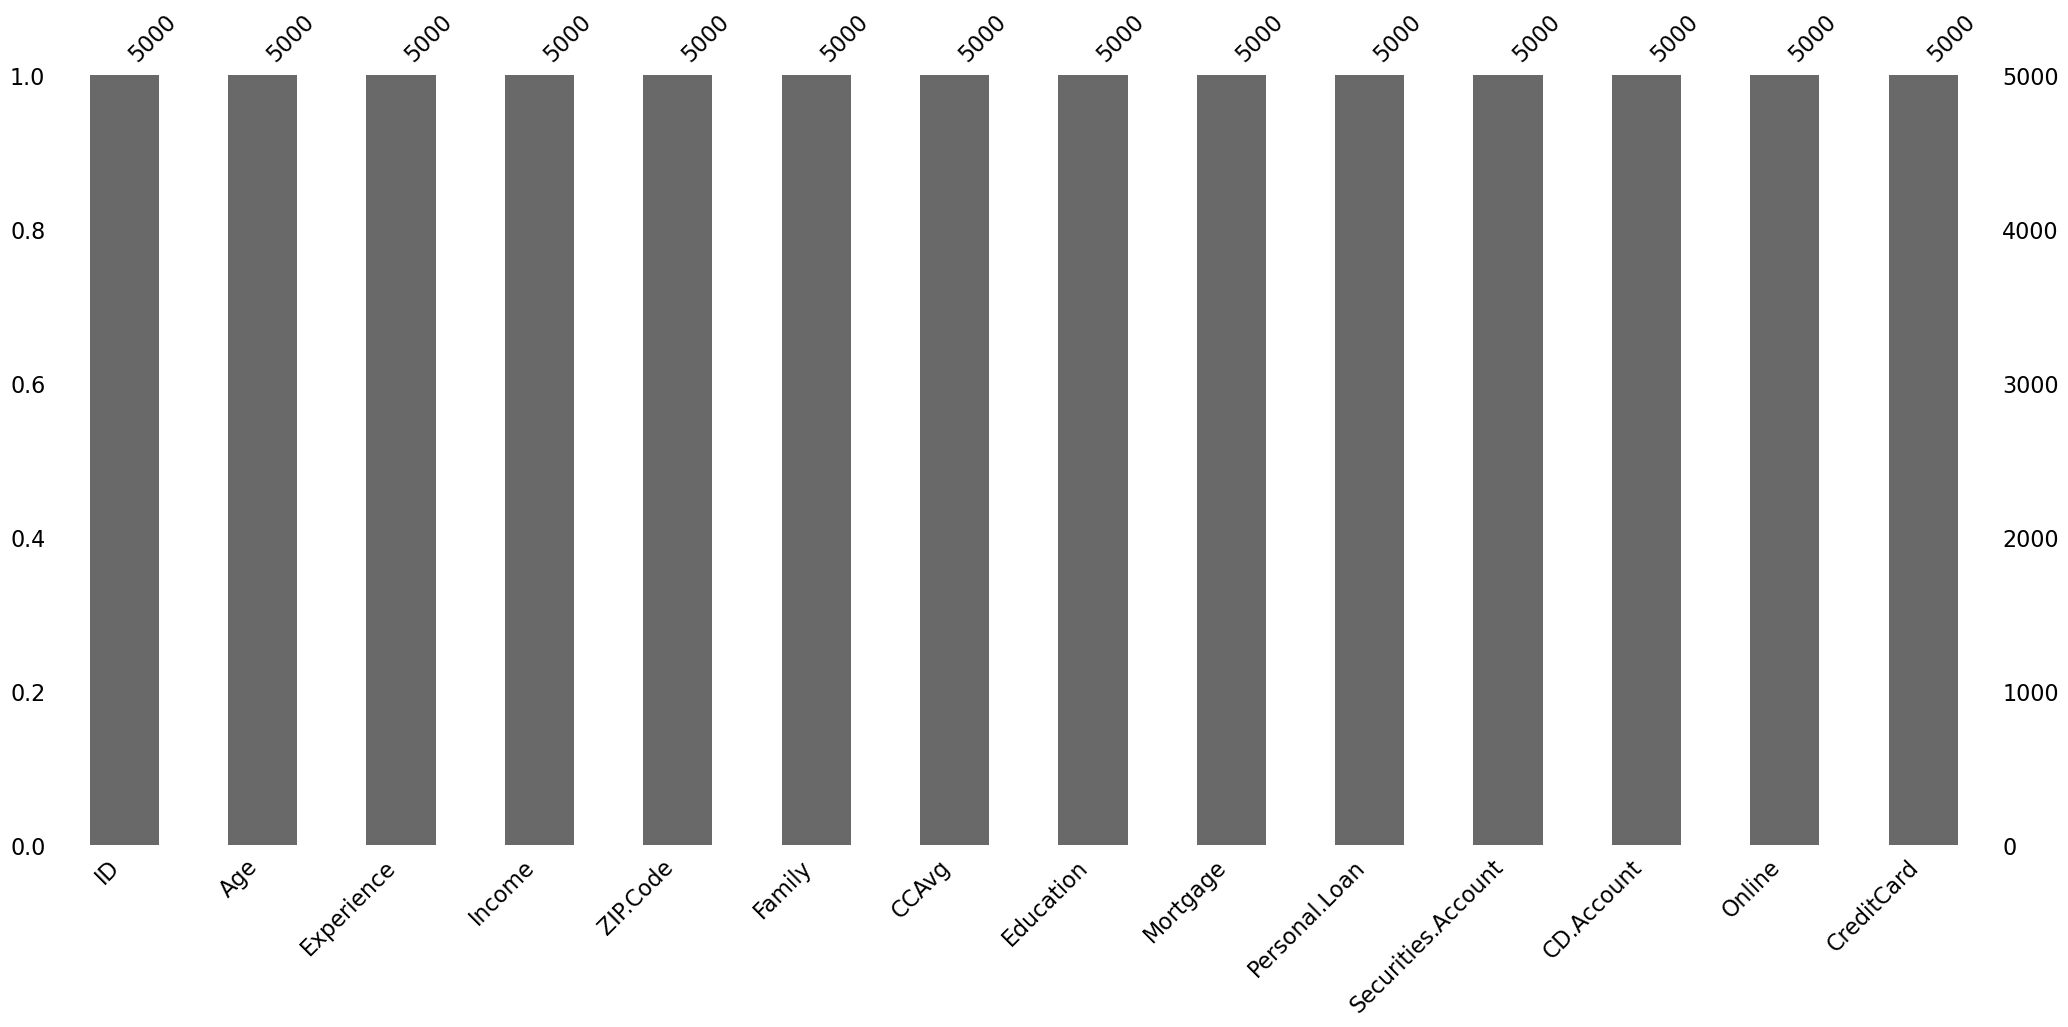

In [121]:
import missingno as msno
msno.bar(bank_loan)

In [122]:
# Shape of the dataset
bank_loan.shape
print(f'The dataset has {bank_loan.shape[0]} rows and {bank_loan.shape[1]} columns')

The dataset has 5000 rows and 14 columns


In [123]:
# Checking for duplicates
bank_loan.duplicated().sum()
print(f'The dataset has {bank_loan.duplicated().sum()} duplicates')

The dataset has 0 duplicates


## Step 2: Exploratory Analysis

In [124]:
bank_loan.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [125]:
# Checking correlation between features of the dataset
bank_loan.corr()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP.Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal.Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


#### Loan Approval Ratio

In [126]:
bank_loan['Personal.Loan'].value_counts()

0    4520
1     480
Name: Personal.Loan, dtype: int64

### Loan_Approval based on Age vs Income

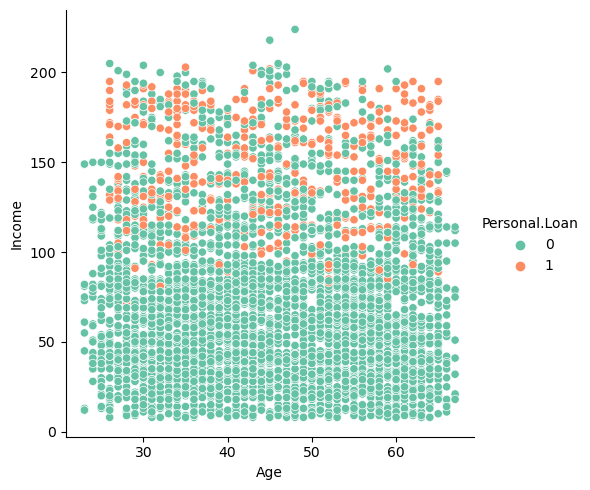

In [127]:
sns.relplot(x='Age', y='Income', data=bank_loan, hue='Personal.Loan', palette='Set2')

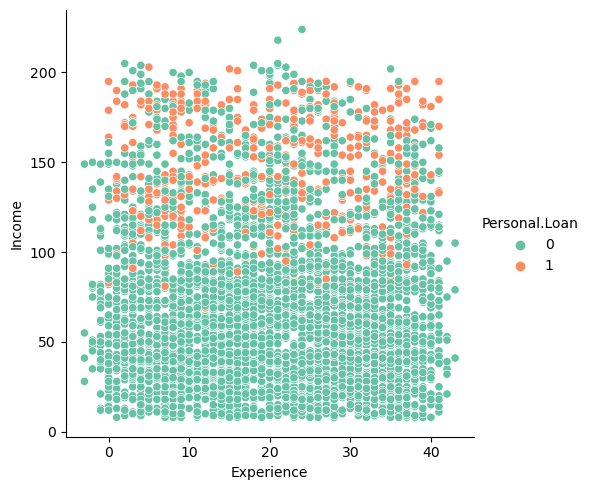

In [128]:
sns.relplot(x='Experience', y='Income', data=bank_loan, hue='Personal.Loan', palette='Set2')

#### Family Ratio of those Approved vs Not Approved for Personal Loan

In [129]:
bank_loan['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

<AxesSubplot:xlabel='Personal.Loan', ylabel='count'>

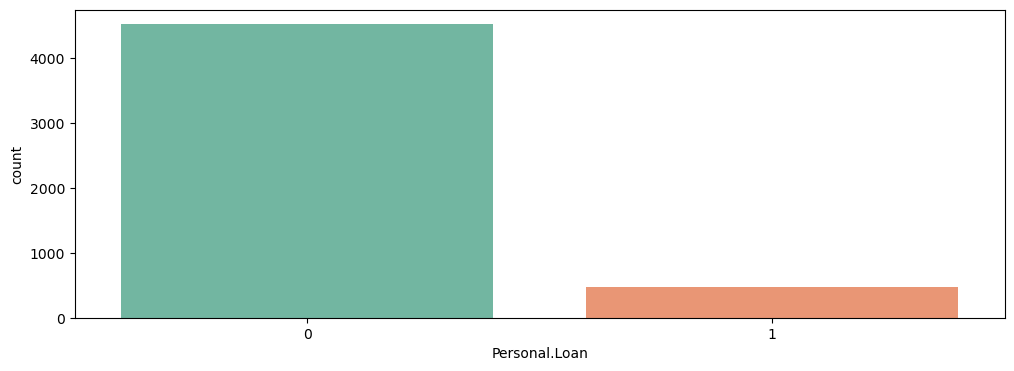

In [130]:
plt.figure(figsize=(12,4))
sns.countplot(x='Personal.Loan', data=bank_loan, palette='Set2')

<AxesSubplot:xlabel='Family', ylabel='count'>

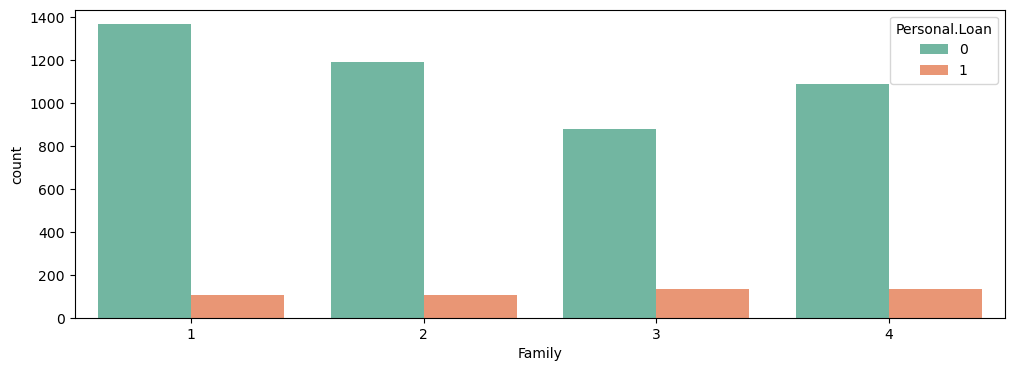

In [131]:
plt.figure(figsize=(12,4))
sns.countplot(x='Family', data=bank_loan, hue='Personal.Loan', palette='Set2')

<AxesSubplot:xlabel='Family', ylabel='Income'>

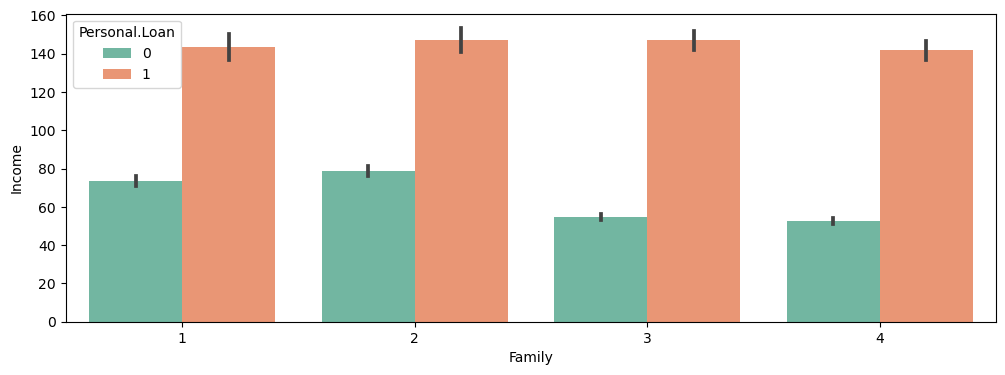

In [132]:
plt.figure(figsize=(12,4))
sns.barplot(x='Family', y='Income', data=bank_loan, hue='Personal.Loan', palette='Set2')

<AxesSubplot:xlabel='Personal.Loan', ylabel='Income'>

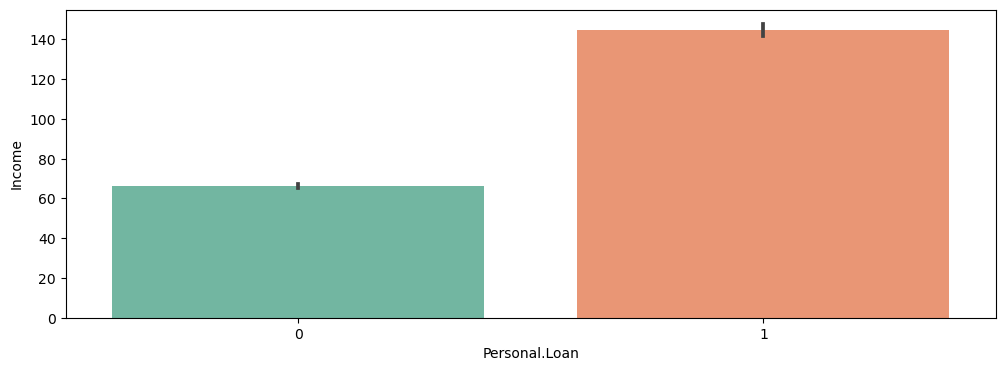

In [133]:
plt.figure(figsize=(12,4))
sns.barplot(x='Personal.Loan', y='Income', data=bank_loan, palette='Set2')

### Step 3: DecisionTree Classification Model

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
x = bank_loan.drop('Personal.Loan', axis=1)
y = bank_loan['Personal.Loan']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 13)

(1000, 13)

(4000,)

(1000,)

In [136]:
dtree = DecisionTreeClassifier(min_samples_leaf=3000, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3000, random_state=42)

In [137]:
# Predictions
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[Text(0.5, 0.5, 'gini = 0.17\nsamples = 4000\nvalue = [3625, 375]\nclass = Not Approved')]

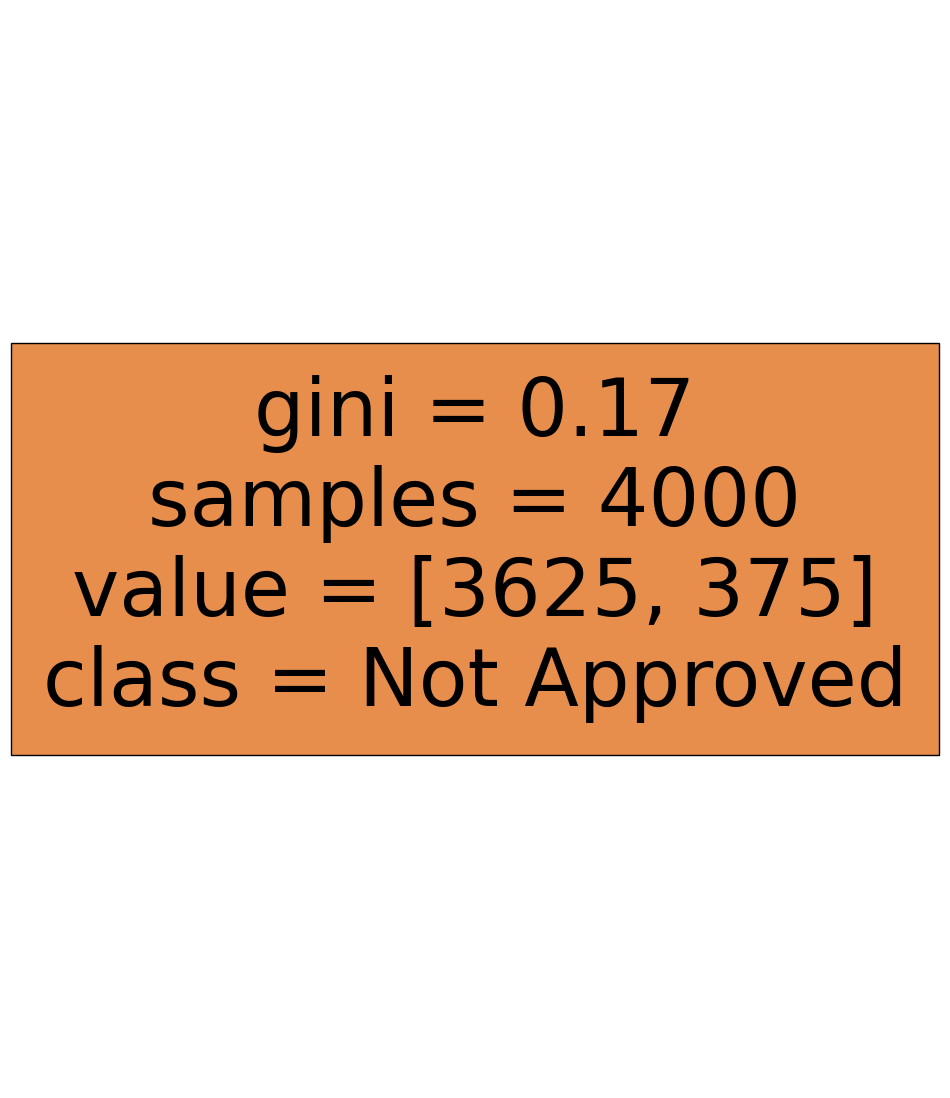

In [138]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,14))
plot_tree(dtree, filled=True, feature_names=X_train.columns, class_names=['Not Approved', 'Approved'])

## Step 4: SMOTE (Synthetic Minority Over-sampling Technique)

In [139]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
display(X_smote.shape, y_smote.shape)

(7250, 13)

(7250,)

In [140]:
smote = DecisionTreeClassifier(min_samples_leaf=2500, random_state=42)
smote.fit(X_smote, y_smote)

DecisionTreeClassifier(min_samples_leaf=2500, random_state=42)

In [146]:
# Smote Predictions
smote_pred = smote.predict(X_test)
smote_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

[Text(0.5, 0.75, 'Income <= 95.5\ngini = 0.5\nsamples = 7250\nvalue = [3625, 3625]\nclass = Not Approved'),
 Text(0.25, 0.25, 'gini = 0.084\nsamples = 3089\nvalue = [2953, 136]\nclass = Not Approved'),
 Text(0.75, 0.25, 'gini = 0.271\nsamples = 4161\nvalue = [672, 3489]\nclass = Approved')]

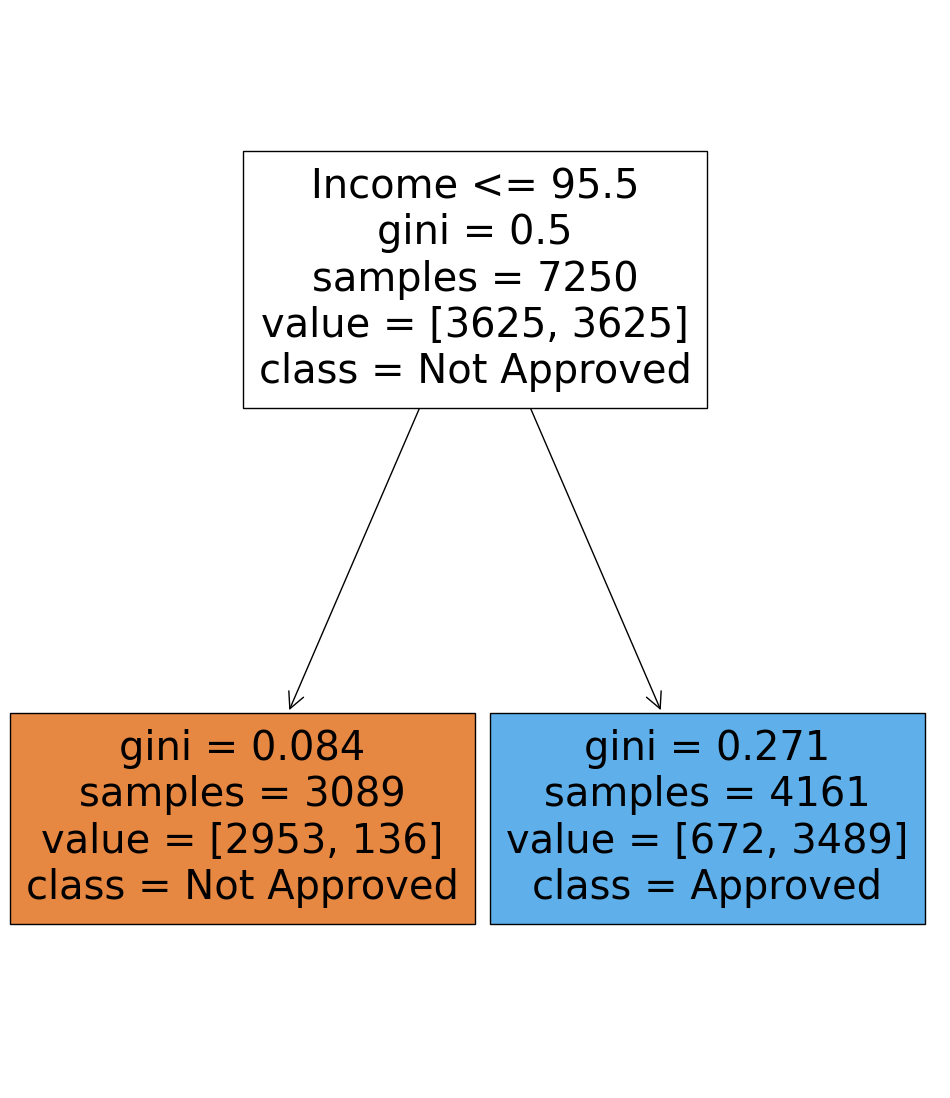

In [147]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,14))
plot_tree(smote, filled=True, feature_names=X_train.columns, class_names=['Not Approved', 'Approved'])

### Step 5: Evaluation

Dtree Accuracy: 0.895
Dtree Classification:               precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



<AxesSubplot:>

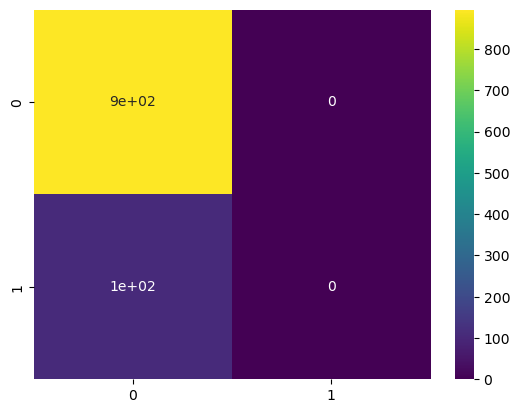

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtree_accuracy = accuracy_score(y_test, dtree_pred)
print('Dtree Accuracy:', dtree_accuracy)

dtree_classification = classification_report(y_test, dtree_pred)
print('Dtree Classification:', dtree_classification)

dtree_confusion = confusion_matrix(y_test, dtree_pred)
display(sns.heatmap(dtree_confusion, annot=True, cmap='viridis'))


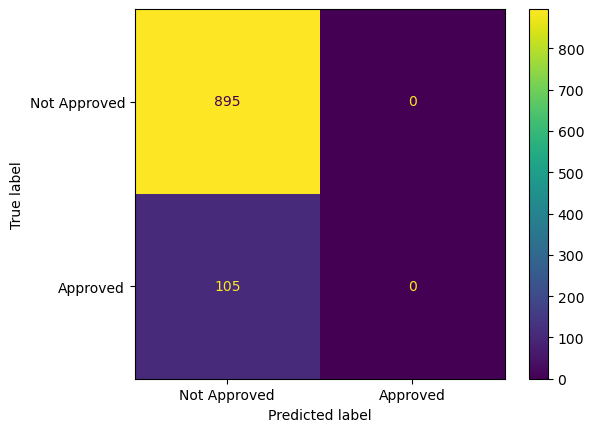

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(dtree_confusion, display_labels=['Not Approved', 'Approved']).plot(cmap='viridis')

Smote Accuracy: 0.838
Smote Classification:               precision    recall  f1-score   support

           0       0.99      0.83      0.90       895
           1       0.39      0.94      0.55       105

    accuracy                           0.84      1000
   macro avg       0.69      0.88      0.73      1000
weighted avg       0.93      0.84      0.86      1000



<AxesSubplot:>

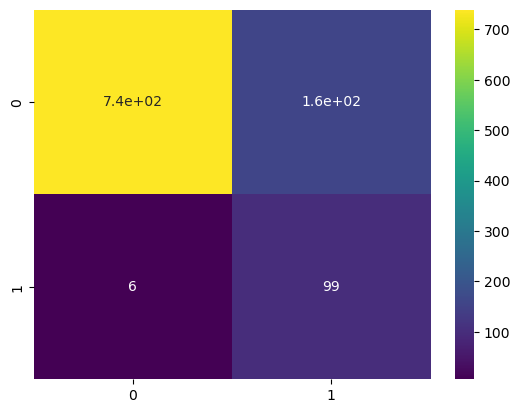

In [149]:

smote_accuracy = accuracy_score(y_test, smote_pred)
print('Smote Accuracy:', smote_accuracy)

smote_classification = classification_report(y_test, smote_pred)
print('Smote Classification:', smote_classification)

smote_confusion = confusion_matrix(y_test, smote_pred)
display(sns.heatmap(smote_confusion, annot=True, cmap='viridis'))

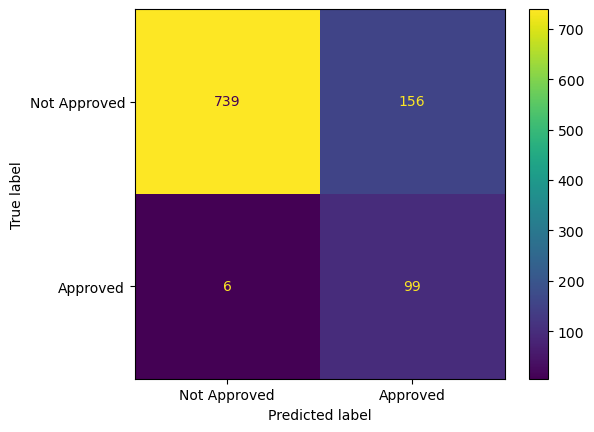

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(smote_confusion, display_labels=['Not Approved', 'Approved']).plot(cmap='viridis')